In [1]:
import xlrd

In [2]:
workbook = xlrd.open_workbook('./blog-gender-dataset.xlsx')

In [3]:
booksheet = workbook.sheet_by_name('data')

In [4]:
texts = []
labels = []

In [5]:
for i in range(booksheet.nrows):
    labels.append(booksheet.cell(i,1).value)
    texts.append(booksheet.cell(i,0).value)

In [6]:
from sklearn.feature_extraction.text import CountVectorizer

In [7]:
TF_vectorizer = CountVectorizer()

In [8]:
TF_vectors = TF_vectorizer.fit_transform(texts)

In [9]:
TF_vectors.shape

(3227, 52456)

In [10]:
x_train = TF_vectors[0:2500]
x_test = TF_vectors[2500:]
y_train = labels[0:2500]
y_test = labels[2500:]

In [11]:
x_train.shape

(2500, 52456)

In [12]:
x_test.shape

(727, 52456)

In [13]:
from sklearn.naive_bayes import MultinomialNB

In [14]:
model = MultinomialNB()

In [15]:
model.fit(x_train,y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [16]:
y_probs = model.predict_proba(x_test)[:,0]

In [17]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

In [18]:
fpr, tpr, _ = roc_curve(y_test, y_probs, pos_label="F")

In [19]:
auc_score = auc(fpr, tpr)

In [20]:
import matplotlib.pyplot as plt

<function matplotlib.pyplot.show(*args, **kw)>

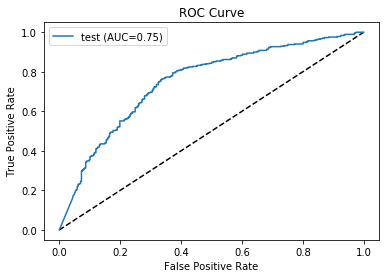

In [21]:
plt.figure(1)
plt.plot([0,1], [0,1], "k--")
plt.plot(fpr,tpr, label='test (AUC=%0.2f)' %  auc_score)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc='best')
plt.show